# K-Nearest Neighbors
Vamos testar possíveis valores de k antes de rodar o modelo em si. 

In [33]:
import aux

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
import matplotlib.pyplot as plt

# Carregar os datasets
og_df, pca_df, pearson_df = aux.get_datasets()

# Preparar listas para comparação
auc_values = []
f1_score_values = []

### Dataset Original

In [34]:
og_X_train, og_X_test, og_y_train, og_y_test = aux.prepare_dataset(og_df)

k = 1 value calculated
k = 2 value calculated
k = 3 value calculated
k = 4 value calculated


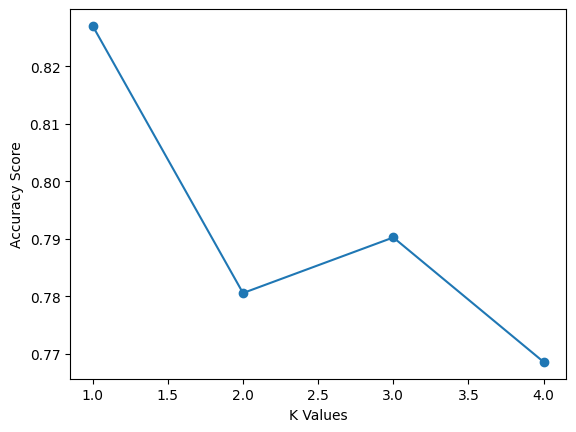

In [35]:
k_values = [i for i in range (1,5)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, og_X_train, og_y_train)
    scores.append(np.mean(score))
    print(f'k = {k} value calculated')
    
plt.plot(k_values, scores, marker='o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")
plt.show()

In [36]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(og_X_train, og_y_train)
y_pred = knn.predict(og_X_test)

auc, f1 = aux.analyse_ml_results(og_y_test, y_pred)
auc_values.append(auc)
f1_score_values.append(f1)

Verdadeiros Ataques: 7246, Falsos Não-Ataques: 24
Falsos Ataques: 2257, Verdadeiros Não-Ataques: 4978
AUC: 0.842
              precision    recall  f1-score   support

          -1       0.76      1.00      0.86      7270
           1       1.00      0.69      0.81      7235

    accuracy                           0.84     14505
   macro avg       0.88      0.84      0.84     14505
weighted avg       0.88      0.84      0.84     14505



### Dataset Reduzido por Pearson

In [37]:
pearson_X_train, pearson_X_test, pearson_y_train, pearson_y_test = aux.prepare_dataset(pearson_df)

k = 5 value calculated
k = 10 value calculated
k = 15 value calculated


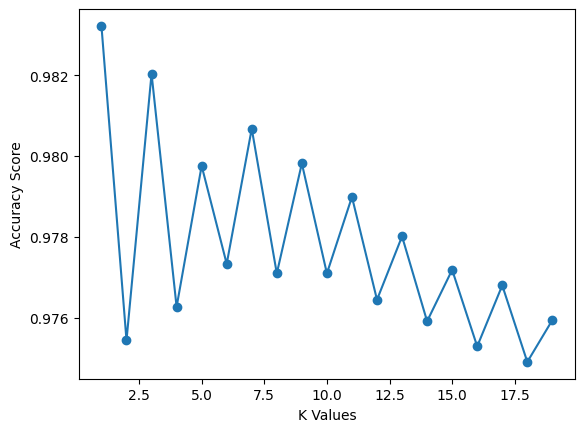

In [38]:
k_values = [i for i in range (1,20)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, pearson_X_train, pearson_y_train)
    scores.append(np.mean(score))
    if k % 5 == 0:
        print(f'k = {k} value calculated')
    
plt.plot(k_values, scores, marker='o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")
plt.show()

In [39]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(pearson_X_train, pearson_y_train)
y_pred = knn.predict(pearson_X_test)

auc, f1 = aux.analyse_ml_results(pearson_y_test, y_pred)
auc_values.append(auc)
f1_score_values.append(f1)

Verdadeiros Ataques: 7257, Falsos Não-Ataques: 13
Falsos Ataques: 199, Verdadeiros Não-Ataques: 7036
AUC: 0.985
              precision    recall  f1-score   support

          -1       0.97      1.00      0.99      7270
           1       1.00      0.97      0.99      7235

    accuracy                           0.99     14505
   macro avg       0.99      0.99      0.99     14505
weighted avg       0.99      0.99      0.99     14505



### Dataset Reduzido por PCA

In [40]:
pca_X_train, pca_X_test, pca_y_train, pca_y_test = aux.prepare_dataset(pca_df)

k = 5 value calculated
k = 10 value calculated
k = 15 value calculated


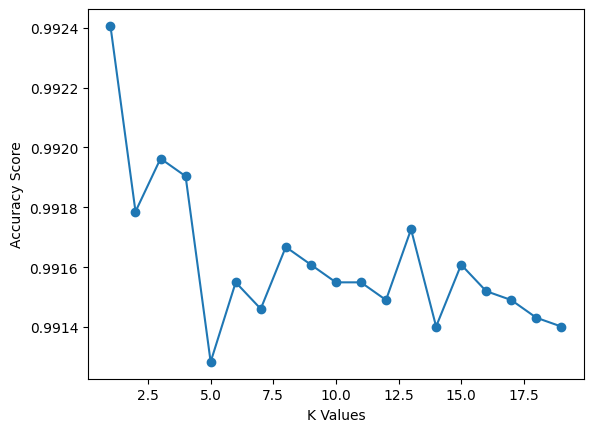

In [41]:
k_values = [i for i in range (1,20)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, pca_X_train, pca_y_train)
    scores.append(np.mean(score))
    if k % 5 == 0:
        print(f'k = {k} value calculated')
    
plt.plot(k_values, scores, marker='o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")
plt.show()

In [42]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(pca_X_train, pca_y_train)
y_pred = knn.predict(pca_X_test)

auc, f1 = aux.analyse_ml_results(pca_y_test, y_pred)
auc_values.append(auc)
f1_score_values.append(f1)

Verdadeiros Ataques: 7212, Falsos Não-Ataques: 58
Falsos Ataques: 67, Verdadeiros Não-Ataques: 7168
AUC: 0.991
              precision    recall  f1-score   support

        -1.0       0.99      0.99      0.99      7270
         1.0       0.99      0.99      0.99      7235

    accuracy                           0.99     14505
   macro avg       0.99      0.99      0.99     14505
weighted avg       0.99      0.99      0.99     14505



Comparando os três métodos, temos:

In [43]:
f1_score_values

[0.8388636858241472, 0.9853814940234477, 0.9913822657515416]

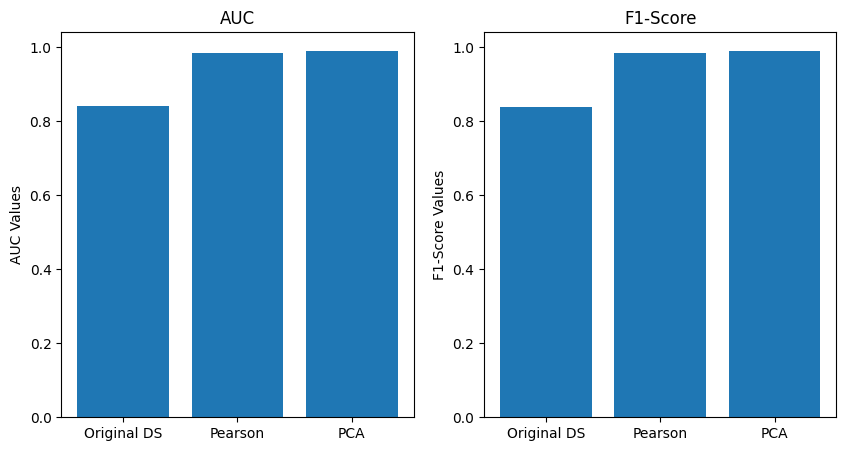

In [44]:
aux.plot_auc_and_f1(auc_values, f1_score_values)